In [110]:
from pathlib import Path 

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 

### Folders 
framestep = 5
offolder = 'c:/Users/hvrl/Documents/data/KU/of300/framestep' + f'{framestep:04d}'

In [111]:
of_folder = Path(offolder)
# Get list of all optical frames path 
of_list = [f for f in of_folder.iterdir() if f.is_file() and '.npy' in str(f)]

videos_ids = [
    "0838_0917", 
    "2108_2112", 
    "5909_5915", 
    "green0410_0452", 
    "green0810_0840"
]

# List of values 
all_values = [[] for i in range(len(videos_ids))]

for i, id in enumerate(videos_ids): 
    for flowfile in of_list: 
        if id in str(flowfile.stem): 
            flow = np.load(flowfile)
            norms = np.sqrt(flow[:,:,0]**2+flow[:,:,1]**2)
            all_values[i] += list(norms.flatten().astype(int))


In [112]:
counts_list = [np.unique(np.array(values_list), return_counts=True) for values_list in all_values]
print("DEBUG PRINT: STOP 2")

DEBUG PRINT: STOP 2


In [113]:
# print(counts_list)
# for i in range(len(counts_list)): 
#     print(counts_list[i][0], len(counts_list[i][1]))

nbOfBins = [len(counts_list[i][0]) for i in range(len(counts_list))]


print(nbOfBins)

[25, 93, 50, 48, 48]


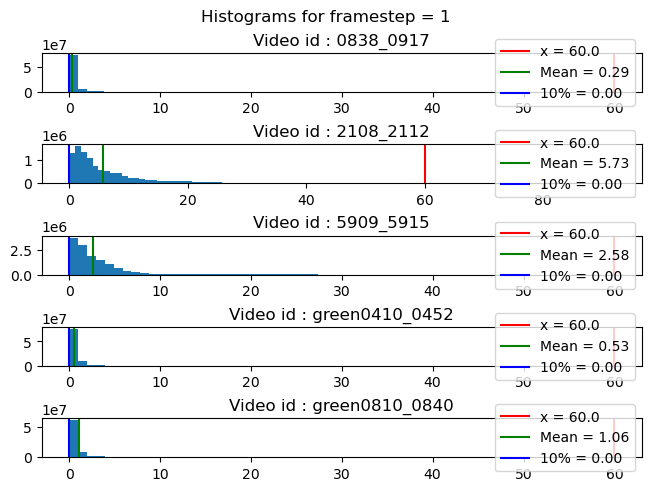

In [114]:
# plt.figure()
fig, axes = plt.subplots(len(videos_ids), 1, constrained_layout=True)
# fig.tight_layout(pad=5.0)
for i in range(len(counts_list)): 
    axes[i].hist(counts_list[i][0], bins=nbOfBins[i], weights=counts_list[i][1])
    axes[i].axvline(x = 0.2*300, color = 'r', label = f'x = {0.2*300}')
    moyenne = np.mean(all_values[i])
    axes[i].axvline(x = moyenne, color = 'g', label = f'Mean = {moyenne:.2f}')
    dixpercent = np.quantile(all_values[i], 0.1)
    axes[i].axvline(x = dixpercent, color = 'b', label = f'10% = {dixpercent:.2f}')
    axes[i].legend(loc="right")
    axes[i].title.set_text(f'Video id : {videos_ids[i]}')
fig.suptitle(f'Histograms for framestep = {framestep}')
plt.show()

In [115]:
# trunc_counts_list = [[] for i in range(len(counts_list))]
# for i in range(len(counts_list)): 
#     trunc_counts_list[i] = np.where(counts_list[i][0] > 0.2*300), counts_list[i][1][np.where(counts_list[i][0] > 0.2*300)]

# print(trunc_counts_list[0])

In [116]:
# for i in range(len(trunc_counts_list)): 
#     if len(trunc_counts_list[i][1]) > 0: 
#         plt.hist(trunc_counts_list[i][0], bins=len(trunc_counts_list[i][1]), weights=trunc_counts_list[i][1])
#         plt.title(f'Video id : {videos_ids[i]}')
#         plt.show()